In [ ]:
!pip install tensorflow_decision_forests
# TF-DF requires Tensorflow < 2.15 or tf_keras
!pip install tf_keras

In [ ]:
!pip install wurlitzer
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_keras
import math
from sklearn.model_selection import train_test_split

#With Encoding

In [ ]:
dataset_df = pd.read_excel('/content/Data-RF_corrected.xlsx')

In [ ]:
dataset_df['Lab-Test1(30)'] = dataset_df['Lab-Test1(30)'].astype(str).str.strip().astype(float)
dataset_df['Lab-Test2(24)'] = dataset_df['Lab-Test2(24)'].astype(str).str.strip().astype(float)
dataset_df['Midsem Test (90)'] = dataset_df['Midsem Test (90)'].astype(str).str.strip().astype(float)
dataset_df['Gender'] = dataset_df['Gender'].str.strip()
dataset_df['Attendance'] = dataset_df['Attendance'].str.strip()
dataset_df['Grade'] = dataset_df['Grade'].str.strip()

In [ ]:
dataset_df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24.0,66.0,Male,High,A
1,15.00,24.0,67.0,Female,High,A
2,5.25,24.0,45.0,Male,High,B-
3,2.75,19.0,34.0,Male,High,C-
4,7.25,24.0,30.0,Male,High,C-


In [ ]:
dataset_df["Gender"] = dataset_df["Gender"].map({"Male": 0, "Female": 1})

In [ ]:
dataset_df["Attendance"] = dataset_df["Attendance"].map({"High": 2, "Moderate": 1,"Low":0})

In [ ]:
dataset_df["Grade"] = dataset_df["Grade"].map({"A": 7, "A-": 6,"B":5,"B-":4,"C":3,"C-":2,"D":1,"E":0})

In [ ]:
print(dataset_df.head())

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance  Grade
0          13.00           24.0              66.0       0           2      7
1          15.00           24.0              67.0       1           2      7
2           5.25           24.0              45.0       0           2      4
3           2.75           19.0              34.0       0           2      2
4           7.25           24.0              30.0       0           2      2


In [ ]:
train_ds_pd, test_ds_pd = train_test_split(dataset_df, test_size=0.3, random_state=42)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

350 examples in training, 150 examples for testing.


In [ ]:
train_ds_pd

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
5,8.00,24.0,12.0,0,2,1
116,16.00,24.0,51.0,0,2,5
45,4.25,0.0,26.0,1,2,1
16,0.00,24.0,40.0,1,2,3
462,3.75,24.0,23.0,1,2,2
...,...,...,...,...,...,...
106,2.25,24.0,42.0,0,2,3
270,16.00,24.0,38.0,1,1,4
348,7.25,24.0,39.0,1,0,3
435,5.50,24.0,37.0,1,2,3


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
GBDT_model = tfdf.keras.GradientBoostedTreesModel(verbose=2,categorical_algorithm="CART",task=tfdf.keras.Task.CLASSIFICATION,num_trees=30)
GBDT_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpztrowm6x as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-10 16:34:38.4806 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-10 16:34:38.4806 UTC kernel.cc:772] Collect training examples
[INFO 24-02-10 16:34:38.4807 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-10 16:34:38.4808 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-10 16:34:38.4808 UTC kernel.cc:392] Number of examples: 350
[INFO 24-02-10 16:34:38.4808 UTC kernel.cc:792] Training dataset:
Number of records: 350
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.70286 min:0 max:2 sd:0.6742

Model trained in 0:00:00.626366
Compiling model...
Model compiled.


In [ ]:
GBDT_model.compile(metrics=["accuracy"])
evaluation = GBDT_model.evaluate(train_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - accuracy: 0.9857

loss: 0.0000
accuracy: 0.9857


In [ ]:
GBDT_model.compile(metrics=["accuracy"])
evaluation = GBDT_model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 283ms/step - loss: 0.0000e+00 - accuracy: 0.8467

loss: 0.0000
accuracy: 0.8467


In [ ]:
RF_model = tfdf.keras.RandomForestModel(verbose=2,categorical_algorithm="CART",task=tfdf.keras.Task.CLASSIFICATION,num_trees=30)
RF_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp6lv07ozd as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-10 16:34:40.6707 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-10 16:34:40.6708 UTC kernel.cc:772] Collect training examples
[INFO 24-02-10 16:34:40.6708 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-10 16:34:40.6709 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-10 16:34:40.6709 UTC kernel.cc:392] Number of examples: 350
[INFO 24-02-10 16:34:40.6710 UTC kernel.cc:792] Training dataset:
Number of records: 350
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.70286 min:0 max:2 sd:0.6742

Model trained in 0:00:00.155045
Compiling model...
Model compiled.


In [ ]:
RF_model.compile(metrics=["accuracy"])
evaluation = RF_model.evaluate(train_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 303ms/step - loss: 0.0000e+00 - accuracy: 0.9257

loss: 0.0000
accuracy: 0.9257


In [ ]:
RF_model.compile(metrics=["accuracy"])
evaluation = RF_model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 277ms/step - loss: 0.0000e+00 - accuracy: 0.8400

loss: 0.0000
accuracy: 0.8400


In [ ]:
tfdf.model_plotter.plot_model_in_colab(GBDT_model, tree_idx=0, max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(RF_model, tree_idx=0, max_depth=3)

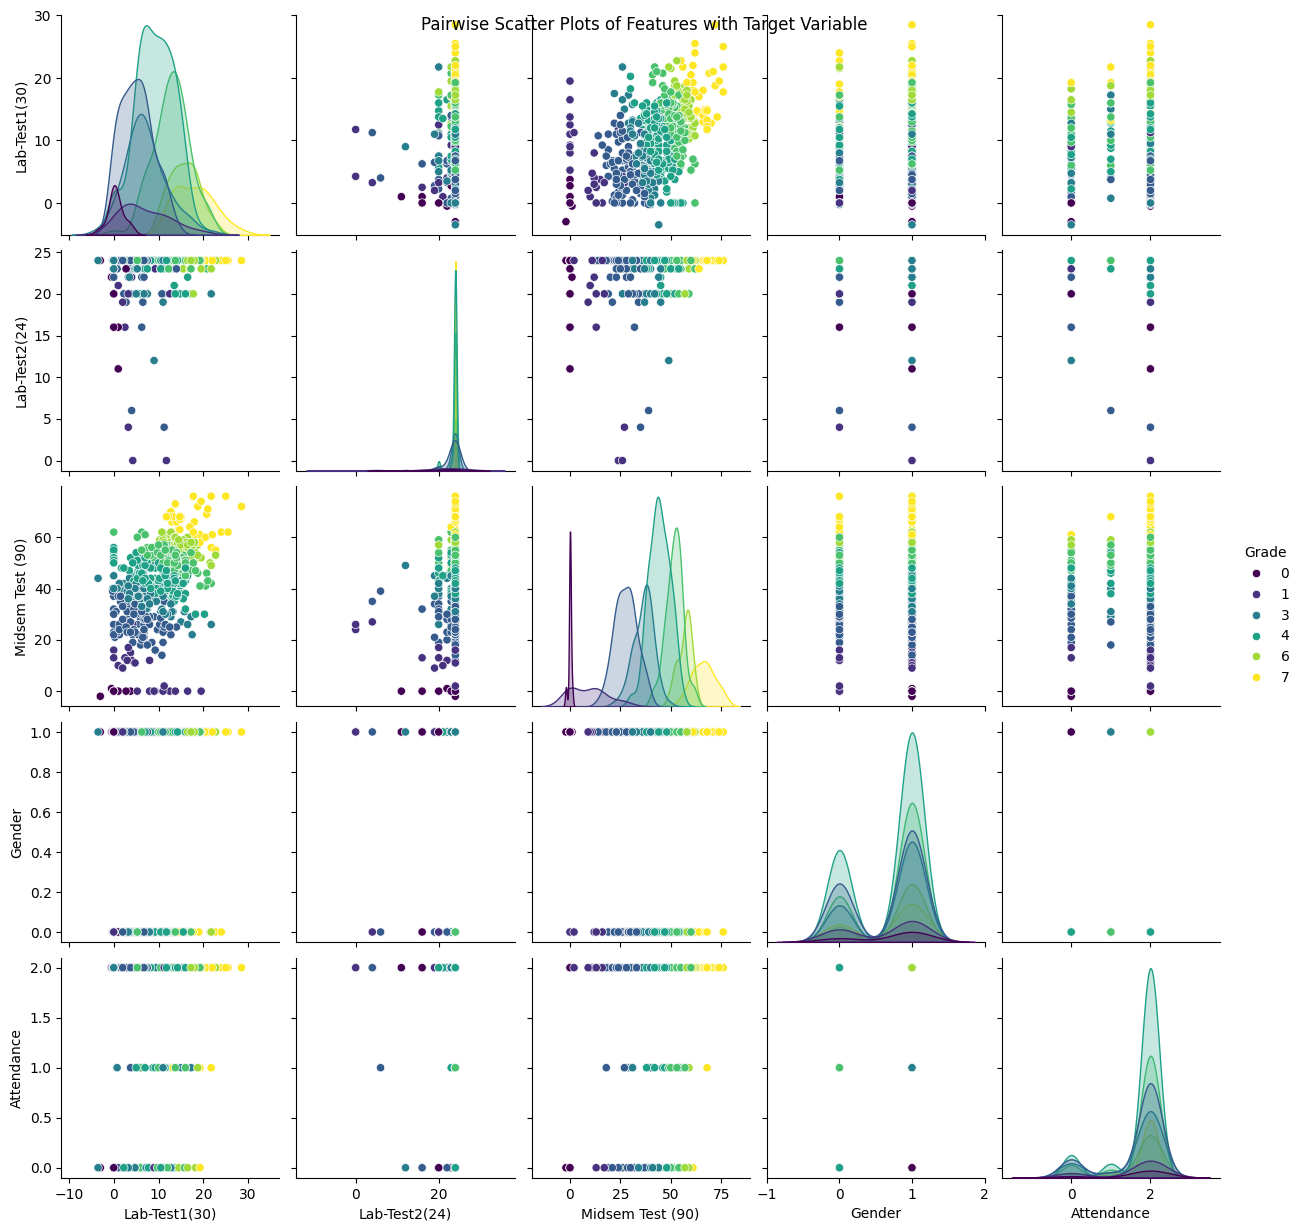

In [ ]:
features = ['Lab-Test1(30)',  'Lab-Test2(24)',  'Midsem Test (90)',  'Gender',  'Attendance']

features_with_target = features + ['Grade']

sns.pairplot(dataset_df[features_with_target], hue='Grade', palette='viridis', markers='o')
plt.suptitle('Pairwise Scatter Plots of Features with Target Variable')
plt.show()

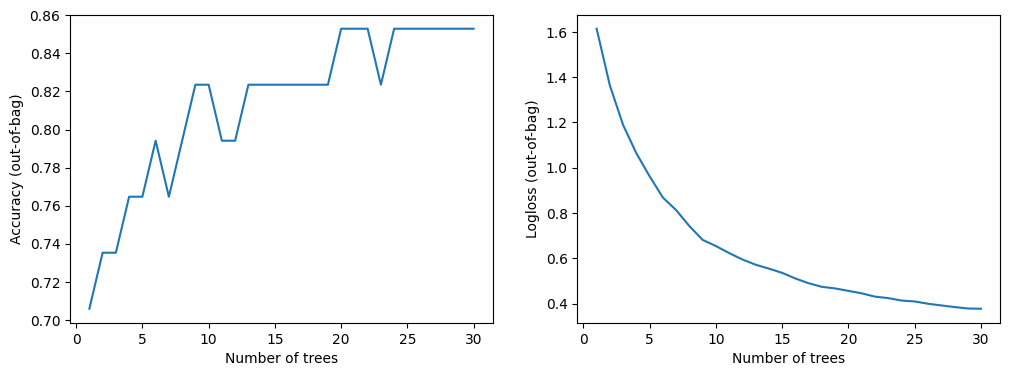

In [ ]:
import matplotlib.pyplot as plt

logs = GBDT_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

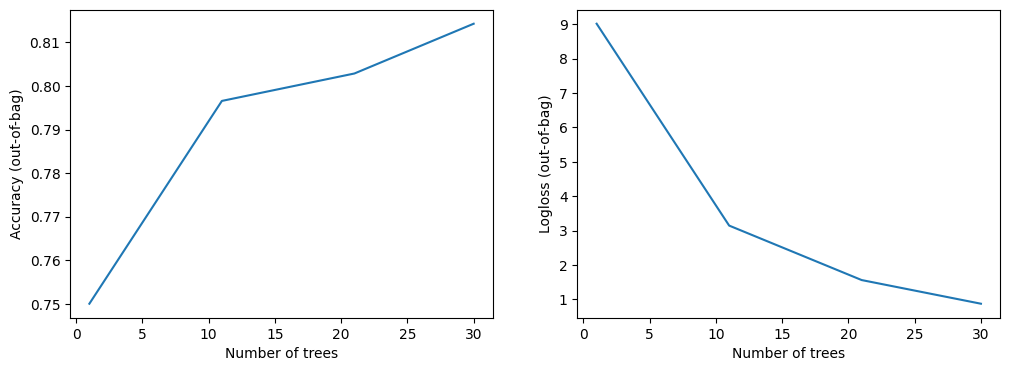

In [ ]:
import matplotlib.pyplot as plt

logs = RF_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

##Accuracy comparison of two different models

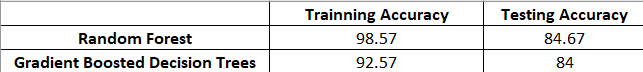

#Without Encoding

In [ ]:
dataset_df = pd.read_excel('/content/Data-RF_corrected.xlsx')

In [ ]:
dataset_df['Lab-Test1(30)'] = dataset_df['Lab-Test1(30)'].astype(str).str.strip().astype(float)
dataset_df['Lab-Test2(24)'] = dataset_df['Lab-Test2(24)'].astype(str).str.strip().astype(float)
dataset_df['Midsem Test (90)'] = dataset_df['Midsem Test (90)'].astype(str).str.strip().astype(float)
dataset_df['Gender'] = dataset_df['Gender'].str.strip()
dataset_df['Attendance'] = dataset_df['Attendance'].str.strip()
dataset_df['Grade'] = dataset_df['Grade'].str.strip()

In [ ]:
dataset_df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24.0,66.0,Male,High,A
1,15.00,24.0,67.0,Female,High,A
2,5.25,24.0,45.0,Male,High,B-
3,2.75,19.0,34.0,Male,High,C-
4,7.25,24.0,30.0,Male,High,C-


In [ ]:
train_ds_pd, test_ds_pd = train_test_split(dataset_df, test_size=0.3, random_state=42)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

350 examples in training, 150 examples for testing.


In [ ]:
train_ds_pd

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
5,8.00,24.0,12.0,Male,High,D
116,16.00,24.0,51.0,Male,High,B
45,4.25,0.0,26.0,Female,High,D
16,0.00,24.0,40.0,Female,High,C
462,3.75,24.0,23.0,Female,High,C-
...,...,...,...,...,...,...
106,2.25,24.0,42.0,Male,High,C
270,16.00,24.0,38.0,Female,Moderate,B-
348,7.25,24.0,39.0,Female,Low,C
435,5.50,24.0,37.0,Female,High,C


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
GBDT_model = tfdf.keras.GradientBoostedTreesModel(verbose=2,categorical_algorithm="CART",task=tfdf.keras.Task.CLASSIFICATION,num_trees=30)
GBDT_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpxplahzd1 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semanti

[INFO 24-02-10 16:34:03.2051 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-10 16:34:03.2051 UTC kernel.cc:772] Collect training examples
[INFO 24-02-10 16:34:03.2051 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-10 16:34:03.2052 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-10 16:34:03.2052 UTC kernel.cc:392] Number of examples: 350
[INFO 24-02-10 16:34:03.2054 UTC kernel.cc:792] Training dataset:
Number of records: 350
Number of columns: 6

Number of columns by type:
	CATEGORICAL: 3 (50%)
	NUMERICAL: 3 (50%)

Columns:

CATEGORICAL: 3 (50%)
	0: "Attendance" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-fre

Model trained in 0:00:00.425880
Compiling model...
Model compiled.


In [ ]:
GBDT_model.compile(metrics=["accuracy"])
evaluation = GBDT_model.evaluate(train_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 291ms/step - loss: 0.0000e+00 - accuracy: 0.9886

loss: 0.0000
accuracy: 0.9886


In [ ]:
GBDT_model.compile(metrics=["accuracy"])
evaluation = GBDT_model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 286ms/step - loss: 0.0000e+00 - accuracy: 0.8333

loss: 0.0000
accuracy: 0.8333


In [ ]:
RF_model = tfdf.keras.RandomForestModel(verbose=2,categorical_algorithm="CART",task=tfdf.keras.Task.CLASSIFICATION,num_trees=30)
RF_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp40lz6lpt as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semanti

[INFO 24-02-10 16:34:05.3454 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-10 16:34:05.3454 UTC kernel.cc:772] Collect training examples
[INFO 24-02-10 16:34:05.3454 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-10 16:34:05.3456 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-10 16:34:05.3456 UTC kernel.cc:392] Number of examples: 350
[INFO 24-02-10 16:34:05.3457 UTC kernel.cc:792] Training dataset:
Number of records: 350
Number of columns: 6

Number of columns by type:
	CATEGORICAL: 3 (50%)
	NUMERICAL: 3 (50%)

Columns:

CATEGORICAL: 3 (50%)
	0: "Attendance" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-fre

Model trained in 0:00:00.100502
Compiling model...
Model compiled.


In [ ]:
RF_model.compile(metrics=["accuracy"])
evaluation = RF_model.evaluate(train_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 296ms/step - loss: 0.0000e+00 - accuracy: 0.9200

loss: 0.0000
accuracy: 0.9200


In [ ]:
RF_model.compile(metrics=["accuracy"])
evaluation = RF_model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 348ms/step - loss: 0.0000e+00 - accuracy: 0.8600

loss: 0.0000
accuracy: 0.8600


In [ ]:
tfdf.model_plotter.plot_model_in_colab(GBDT_model, tree_idx=0, max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(RF_model, tree_idx=0, max_depth=3)

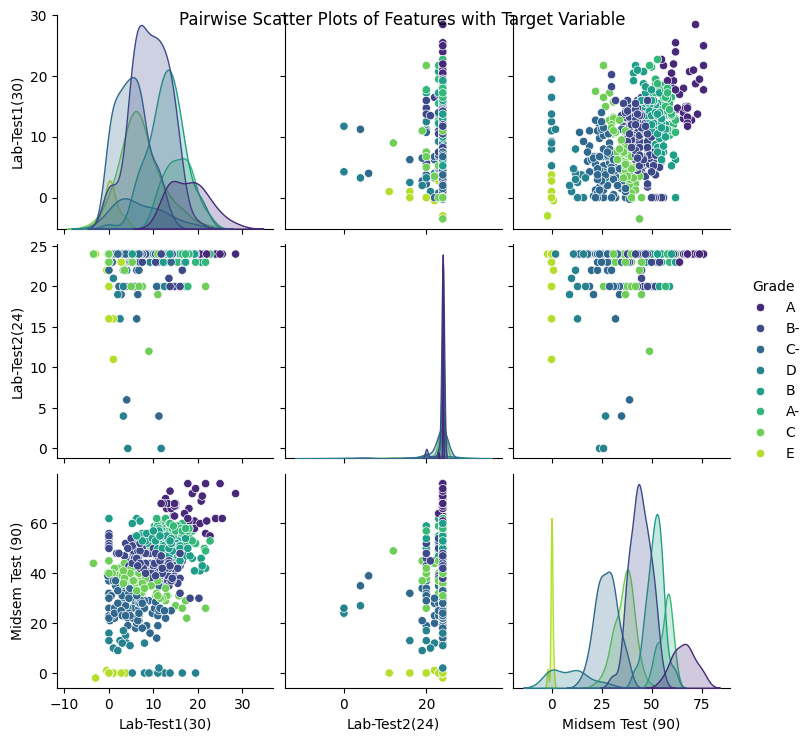

In [ ]:
features = ['Lab-Test1(30)',  'Lab-Test2(24)',  'Midsem Test (90)',  'Gender',  'Attendance']

features_with_target = features + ['Grade']

sns.pairplot(dataset_df[features_with_target], hue='Grade', palette='viridis', markers='o')
plt.suptitle('Pairwise Scatter Plots of Features with Target Variable')
plt.show()

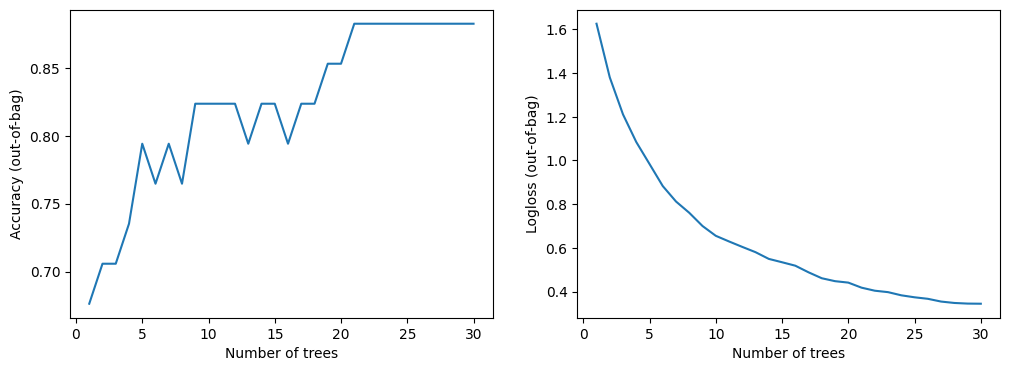

In [ ]:
import matplotlib.pyplot as plt

logs = GBDT_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

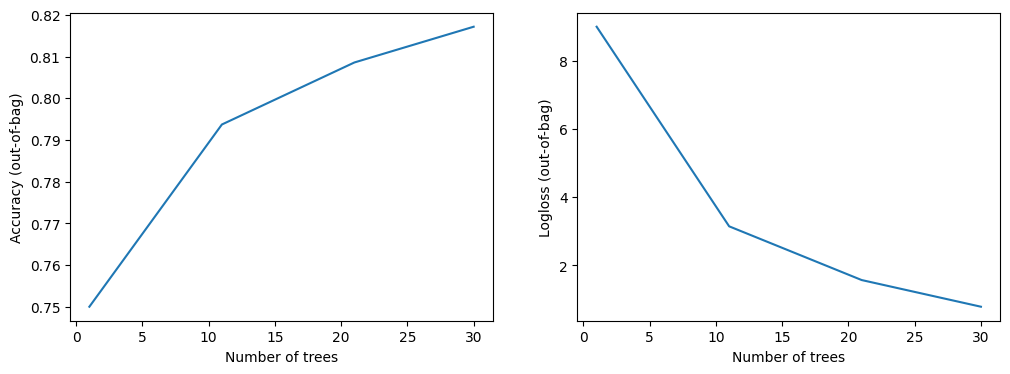

In [ ]:
import matplotlib.pyplot as plt

logs = RF_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

##Accuracy comparison of two different models

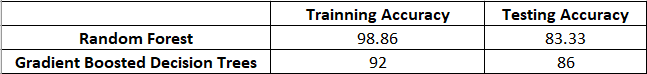

#Conclusion


*   The number of trees and maximum depth hyper-parameters for a reasonable accuracy say, 85% and above is 30 and 10 respectively giving us 86% accuracy.
*   As we increase the number of trees keeping max_depth same the accuracy increases as shown in below table:

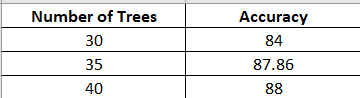

*   Now, if we keep num_trees as 30 and increase the max_depth of the trees the accuracy increases as shown in the below table:






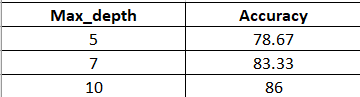